<a href="https://colab.research.google.com/github/andrewli2403/stat165/blob/main/stat_165_final_project_prediction_global_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1RiHTp6xid3b8LvGKHxuMWqCoVVY3RUSI?usp=drive_link -O /content

Retrieving folder contents
Processing file 1zbLUBDrZE-bSpRV0-aiSevdKdNscWsRa WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_REV1.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1zbLUBDrZE-bSpRV0-aiSevdKdNscWsRa
To: /content/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_REV1.csv
100% 7.90M/7.90M [00:00<00:00, 67.5MB/s]
Download completed


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize

In [ ]:
data = pd.read_csv("/content/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_REV1.csv")
data

<ipython-input-4-b552906d5a61>:1: DtypeWarning: Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_REV1.csv")


,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,581,498,240,272,208,379,430,325,0,0
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,567,490,231,258,204,368,416,319,0,0
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,546,477,219,240,197,353,396,310,0,0
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,536,470,213,233,193,345,386,304,0,0
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,523,458,206,224,187,335,375,296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,20592,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,92,103,31,27,34,83,82,83,- 0,-16.7
20592,20593,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,99,89,29,29,29,80,89,72,- 0,-14.4
20593,20594,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,78,80,24,22,26,67,69,64,- 0,-14.5
20594,20595,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,86,86,27,25,28,73,76,70,- 0,-7.1


In [ ]:
location_map = {903: 'Africa', 935: 'Asia', 908: 'Europe', 904: 'South America', 905: 'North America', 909: 'Oceania'}

In [ ]:
continents = data[data['Location code'].isin(location_map.keys())]
continents['Total Population, as of 1 January'] = continents['Total Population, as of 1 January (thousands)'].map(lambda i: i.replace(" ", "")).astype(float) * 1000
continents['Total Population, as of 1 July'] = continents['Total Population, as of 1 July (thousands)'].map(lambda i: i.replace(" ", "")).astype(float) * 1000
continents['Crude Birth Rate (births per 1,000 population)'] = continents['Crude Birth Rate (births per 1,000 population)'].astype(float)
continents['Crude Death Rate (deaths per 1,000 population)'] = continents['Crude Death Rate (deaths per 1,000 population)'].astype(float)
continents['birth_rate'] = continents['Crude Birth Rate (births per 1,000 population)'].astype(float) / 1000
continents['death_rate'] = continents['Crude Death Rate (deaths per 1,000 population)'].astype(float) / 1000
continents


<ipython-input-6-39375e3ef9d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continents['Total Population, as of 1 January'] = continents['Total Population, as of 1 January (thousands)'].map(lambda i: i.replace(" ", "")).astype(float) * 1000
<ipython-input-6-39375e3ef9d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continents['Total Population, as of 1 July'] = continents['Total Population, as of 1 July (thousands)'].map(lambda i: i.replace(" ", "")).astype(float) * 1000
<ipython-input-6-39375e3ef9d

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Total Population, as of 1 January","Total Population, as of 1 July",birth_rate,death_rate
1588,1589,Estimates,AFRICA,NaN,903,NaN,NaN,2.0,Region,1840,...,292,448,474,422,- 28,-0.1,225120000.0,227549000.0,0.0481,0.0266
1589,1590,Estimates,AFRICA,NaN,903,NaN,NaN,2.0,Region,1840,...,291,447,473,420,- 56,-0.2,229978000.0,232484000.0,0.0482,0.0264
1590,1591,Estimates,AFRICA,NaN,903,NaN,NaN,2.0,Region,1840,...,288,443,470,416,- 101,-0.4,234990000.0,237586000.0,0.0482,0.0259
1591,1592,Estimates,AFRICA,NaN,903,NaN,NaN,2.0,Region,1840,...,284,439,466,411,- 210,-0.9,240182000.0,242837000.0,0.0482,0.0255
1592,1593,Estimates,AFRICA,NaN,903,NaN,NaN,2.0,Region,1840,...,281,439,470,408,- 203,-0.8,245493000.0,248245000.0,0.0481,0.0251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18647,18648,Estimates,OCEANIA,NaN,909,NaN,NaN,9.0,Region,1840,...,39,99,122,75,289,6.9,41459000.0,41817000.0,0.0168,0.0065
18648,18649,Estimates,OCEANIA,NaN,909,NaN,NaN,9.0,Region,1840,...,39,99,122,75,295,7.0,42175000.0,42540000.0,0.0166,0.0064
18649,18650,Estimates,OCEANIA,NaN,909,NaN,NaN,9.0,Region,1840,...,39,101,126,75,332,7.7,42904000.0,43278000.0,0.0162,0.0065
18650,18651,Estimates,OCEANIA,NaN,909,NaN,NaN,9.0,Region,1840,...,34,86,103,68,151,3.4,43652000.0,43933000.0,0.0157,0.0063


<Axes: xlabel='Year', ylabel='Total Population, as of 1 July'>

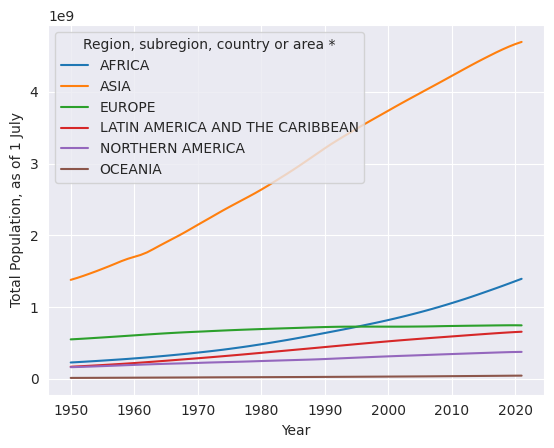

In [ ]:
sns.set_style("darkgrid")
sns.lineplot(continents, x='Year', y='Total Population, as of 1 July', hue='Region, subregion, country or area *')

Text(0.5, 1.0, 'Birth Rate vs Year')

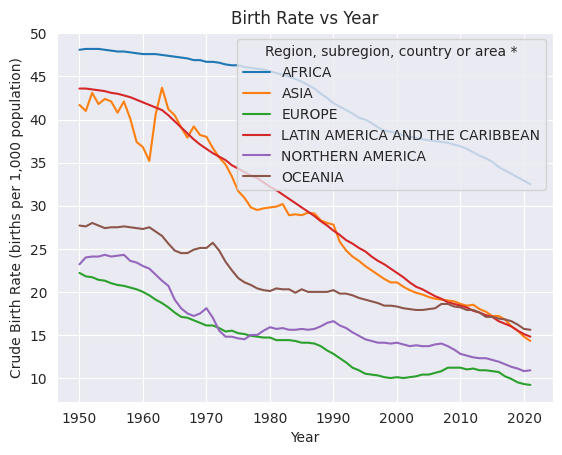

In [ ]:
sns.lineplot(continents, x='Year', y='Crude Birth Rate (births per 1,000 population)', hue='Region, subregion, country or area *')
plt.title("Birth Rate vs Year")

Text(0.5, 1.0, 'Death Rate vs Year')

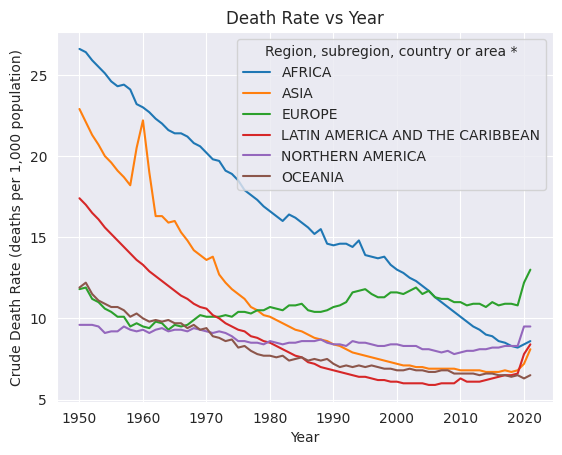

In [ ]:
sns.lineplot(continents, x='Year', y='Crude Death Rate (deaths per 1,000 population)', hue='Region, subregion, country or area *')
plt.title("Death Rate vs Year")

In [ ]:
africa_birth_rate = continents[continents['Region, subregion, country or area *'] == 'AFRICA'][['Year', 'birth_rate']]
asia_birth_rate = continents[continents['Region, subregion, country or area *'] == 'ASIA'][['Year', 'birth_rate']]
europe_birth_rate = continents[continents['Region, subregion, country or area *'] == 'EUROPE'][['Year', 'birth_rate']]
latin_birth_rate = continents[continents['Region, subregion, country or area *'] == 'LATIN AMERICA AND THE CARIBBEAN'][['Year', 'birth_rate']]
north_birth_rate = continents[continents['Region, subregion, country or area *'] == 'NORTHERN AMERICA'][['Year', 'birth_rate']]
oceania_birth_rate = continents[continents['Region, subregion, country or area *'] == 'OCEANIA'][['Year', 'birth_rate']]
africa_recent_birth_rate = np.mean(africa_birth_rate['birth_rate'].values[-5:])
asia_recent_birth_rate = np.mean(asia_birth_rate['birth_rate'].values[-5:])
latin_recent_birth_rate = np.mean(latin_birth_rate['birth_rate'].values[-5:])
oceania_recent_birth_rate = np.mean(oceania_birth_rate['birth_rate'].values[-5:])


In [ ]:
matcher = continents[['Year', 'Region, subregion, country or area *', 'birth_rate']]
matcher = matcher[matcher['Region, subregion, country or area *'] != 'ASIA']
matcher['different'] = np.abs((matcher['birth_rate'] - asia_recent_birth_rate) / asia_recent_birth_rate)
display(matcher.sort_values("different").head(5))

matcher = continents[['Year', 'Region, subregion, country or area *', 'birth_rate']]
matcher = matcher[matcher['Region, subregion, country or area *'] != 'LATIN AMERICA AND THE CARIBBEAN']
matcher['different'] = np.abs((matcher['birth_rate'] - latin_recent_birth_rate) / latin_recent_birth_rate)
display(matcher.sort_values("different").head(5))

matcher = continents[['Year', 'Region, subregion, country or area *', 'birth_rate']]
matcher = matcher[matcher['Region, subregion, country or area *'] != 'OCEANIA']
matcher['different'] = np.abs((matcher['birth_rate'] - oceania_recent_birth_rate) / oceania_recent_birth_rate)
display(matcher.sort_values("different").head(5))

matcher = continents[['Year', 'Region, subregion, country or area *', 'birth_rate']]
matcher = matcher[matcher['Region, subregion, country or area *'] != 'AFRICA']
matcher['different'] = np.abs((matcher['birth_rate'] - africa_recent_birth_rate) / africa_recent_birth_rate)
display(matcher.sort_values("different").head(5))

,Year,"Region, subregion, country or area *",birth_rate,different
18177,1979.0,NORTHERN AMERICA,0.0155,0.001292
18170,1972.0,NORTHERN AMERICA,0.0155,0.001292
14329,2019.0,LATIN AMERICA AND THE CARIBBEAN,0.0155,0.001292
10324,1974.0,EUROPE,0.0155,0.001292
10323,1973.0,EUROPE,0.0154,0.005168


,Year,"Region, subregion, country or area *",birth_rate,different
6265,2019.0,ASIA,0.0155,0.002574
18170,1972.0,NORTHERN AMERICA,0.0155,0.002574
18177,1979.0,NORTHERN AMERICA,0.0155,0.002574
10324,1974.0,EUROPE,0.0155,0.002574
18651,2021.0,OCEANIA,0.0156,0.003861


,Year,"Region, subregion, country or area *",birth_rate,different
18189,1991.0,NORTHERN AMERICA,0.0161,0.004944
10321,1971.0,EUROPE,0.0161,0.004944
10320,1970.0,EUROPE,0.0161,0.004944
14327,2017.0,LATIN AMERICA AND THE CARIBBEAN,0.0163,0.007417
6264,2018.0,ASIA,0.0160,0.011125


,Year,"Region, subregion, country or area *",birth_rate,different
6220,1974.0,ASIA,0.0334,0.003003
14288,1978.0,LATIN AMERICA AND THE CARIBBEAN,0.0332,0.003003
14287,1977.0,LATIN AMERICA AND THE CARIBBEAN,0.0335,0.006006
14286,1976.0,LATIN AMERICA AND THE CARIBBEAN,0.0339,0.018018
14289,1979.0,LATIN AMERICA AND THE CARIBBEAN,0.0327,0.018018


In [ ]:
europe_asia = 1974
north_asia = 1978

pred_asia_europe = europe_birth_rate[europe_birth_rate['Year'] >= europe_asia]
pred_asia_europe['Year'] =  pred_asia_europe['Year'] + asia_birth_rate['Year'].max() - europe_asia

pred_asia_north = north_birth_rate[north_birth_rate['Year'] >= north_asia]
pred_asia_north['Year'] =  pred_asia_north['Year'] + asia_birth_rate['Year'].max() - north_asia

new_asia_birth_rate = pd.concat((asia_birth_rate, pred_asia_europe, pred_asia_north)).groupby("Year", as_index=False).mean()

europe_latin = 1974
north_latin = 1972

pred_latin_europe = europe_birth_rate[europe_birth_rate['Year'] >= europe_latin]
pred_latin_europe['Year'] =  pred_latin_europe['Year'] + latin_birth_rate['Year'].max() - europe_latin

pred_latin_north = north_birth_rate[north_birth_rate['Year'] >= north_latin]
pred_latin_north['Year'] =  pred_latin_north['Year'] + latin_birth_rate['Year'].max() - north_latin

new_latin_birth_rate = pd.concat((latin_birth_rate, pred_latin_europe, pred_latin_north)).groupby("Year", as_index=False).mean()

europe_oceania = 1971
north_oceania = 1991

pred_oceania_europe = europe_birth_rate[europe_birth_rate['Year'] >= europe_oceania]
pred_oceania_europe['Year'] =  pred_oceania_europe['Year'] + oceania_birth_rate['Year'].max() - europe_oceania

pred_oceania_north = north_birth_rate[north_birth_rate['Year'] >= north_oceania]
pred_oceania_north['Year'] =  pred_oceania_north['Year'] + oceania_birth_rate['Year'].max() - north_oceania

new_oceania_birth_rate = pd.concat((oceania_birth_rate, pred_oceania_europe, pred_oceania_north)).groupby("Year", as_index=False).mean()

asia_birth_rate = new_asia_birth_rate
latin_birth_rate = new_latin_birth_rate
oceania_birth_rate = new_oceania_birth_rate

asia_africa = 1974
latin_africa = 1978

pred_africa_asia = asia_birth_rate[asia_birth_rate['Year'] >= asia_africa]
pred_africa_asia['Year'] =  pred_africa_asia['Year'] + africa_birth_rate['Year'].max() - asia_africa

pred_africa_latin = latin_birth_rate[latin_birth_rate['Year'] >= latin_africa]
pred_africa_latin['Year'] =  pred_africa_latin['Year'] + africa_birth_rate['Year'].max() - latin_africa

new_africa_birth_rate = pd.concat((africa_birth_rate, pred_africa_asia, pred_africa_latin)) #.groupby("Year", as_index=False).mean()
africa_birth_rate = new_africa_birth_rate


<ipython-input-12-1ecde321628e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_asia_europe['Year'] =  pred_asia_europe['Year'] + asia_birth_rate['Year'].max() - europe_asia
<ipython-input-12-1ecde321628e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_asia_north['Year'] =  pred_asia_north['Year'] + asia_birth_rate['Year'].max() - north_asia
<ipython-input-12-1ecde321628e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Text(0.5, 1.0, 'Extended Birth Rate vs Year')

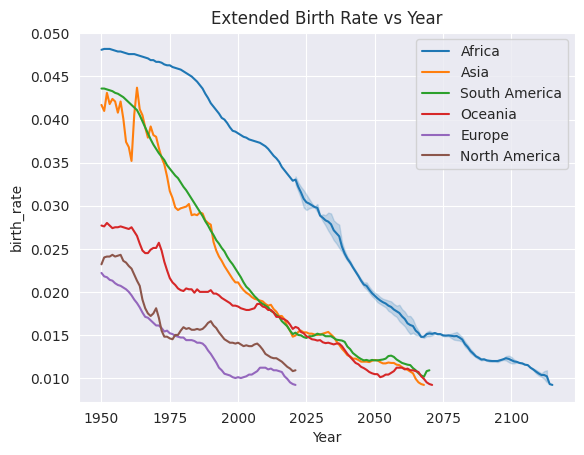

In [ ]:
sns.lineplot(africa_birth_rate, x='Year', y='birth_rate', label='Africa')
sns.lineplot(asia_birth_rate, x='Year', y='birth_rate', label='Asia')
sns.lineplot(latin_birth_rate, x='Year', y='birth_rate', label='South America')
sns.lineplot(oceania_birth_rate, x='Year', y='birth_rate', label='Oceania')
sns.lineplot(europe_birth_rate, x='Year', y='birth_rate', label='Europe')
sns.lineplot(north_birth_rate, x='Year', y='birth_rate', label='North America')
plt.title("Extended Birth Rate vs Year")

In [ ]:
africa_death_rate = continents[continents['Region, subregion, country or area *'] == 'AFRICA'][['Year', 'death_rate']]
asia_death_rate = continents[continents['Region, subregion, country or area *'] == 'ASIA'][['Year', 'death_rate']]
europe_death_rate = continents[continents['Region, subregion, country or area *'] == 'EUROPE'][['Year', 'death_rate']]
latin_death_rate = continents[continents['Region, subregion, country or area *'] == 'LATIN AMERICA AND THE CARIBBEAN'][['Year', 'death_rate']]
north_death_rate = continents[continents['Region, subregion, country or area *'] == 'NORTHERN AMERICA'][['Year', 'death_rate']]
oceania_death_rate = continents[continents['Region, subregion, country or area *'] == 'OCEANIA'][['Year', 'death_rate']]
africa_recent_death_rate = np.mean(africa_death_rate['death_rate'].values[-5:])
asia_recent_death_rate = np.mean(asia_death_rate['death_rate'].values[-5:])
latin_recent_death_rate = np.mean(latin_death_rate['death_rate'].values[-5:])
oceania_recent_death_rate = np.mean(oceania_death_rate['death_rate'].values[-5:])

In [ ]:
# matcher = continents[['Year', 'Region, subregion, country or area *', 'death_rate']]
# matcher = matcher[matcher['Region, subregion, country or area *'] != 'ASIA']
# matcher['different'] = np.abs((matcher['death_rate'] - asia_recent_death_rate) / asia_recent_death_rate)
# display(matcher.sort_values("different").head(10))

# matcher = continents[['Year', 'Region, subregion, country or area *', 'death_rate']]
# matcher = matcher[matcher['Region, subregion, country or area *'] != 'LATIN AMERICA AND THE CARIBBEAN']
# matcher['different'] = np.abs((matcher['death_rate'] - latin_recent_death_rate) / latin_recent_death_rate)
# display(matcher.sort_values("different").head(10))

# matcher = continents[['Year', 'Region, subregion, country or area *', 'death_rate']]
# matcher = matcher[matcher['Region, subregion, country or area *'] != 'OCEANIA']
# matcher['different'] = np.abs((matcher['death_rate'] - oceania_recent_death_rate) / oceania_recent_death_rate)
# display(matcher.sort_values("different").head(10))

matcher = continents[['Year', 'Region, subregion, country or area *', 'death_rate']]
matcher = matcher[matcher['Region, subregion, country or area *'] != 'AFRICA']
matcher['different'] = np.abs((matcher['death_rate'] - africa_recent_death_rate) / africa_recent_death_rate)
display(matcher.sort_values("different").head(20))

,Year,"Region, subregion, country or area *",death_rate,different
18189,1991.0,NORTHERN AMERICA,0.0084,2.065147e-16
14331,2021.0,LATIN AMERICA AND THE CARIBBEAN,0.0084,2.065147e-16
18180,1982.0,NORTHERN AMERICA,0.0084,2.065147e-16
6236,1990.0,ASIA,0.0084,2.065147e-16
18198,2000.0,NORTHERN AMERICA,0.0084,2.065147e-16
18197,1999.0,NORTHERN AMERICA,0.0084,2.065147e-16
18188,1990.0,NORTHERN AMERICA,0.0084,2.065147e-16
18194,1996.0,NORTHERN AMERICA,0.0084,2.065147e-16
18177,1979.0,NORTHERN AMERICA,0.0084,2.065147e-16
18190,1992.0,NORTHERN AMERICA,0.0083,1.190476e-02


In [ ]:
asia_africa = 1990
latin_africa = 1981
north_africa = 1982
oceania_africa = 1976

pred_africa_asia = asia_death_rate[asia_death_rate['Year'] >= asia_africa]
pred_africa_asia['Year'] =  pred_africa_asia['Year'] + africa_death_rate['Year'].max() - asia_africa

pred_africa_latin = latin_death_rate[latin_death_rate['Year'] >= latin_africa]
pred_africa_latin['Year'] =  pred_africa_latin['Year'] + africa_death_rate['Year'].max() - latin_africa

pred_africa_north = north_death_rate[north_death_rate['Year'] >= north_africa]
pred_africa_north['Year'] =  pred_africa_north['Year'] + africa_death_rate['Year'].max() - north_africa

pred_africa_oceania = oceania_death_rate[oceania_death_rate['Year'] >= oceania_africa]
pred_africa_oceania['Year'] =  pred_africa_oceania['Year'] + africa_death_rate['Year'].max() - oceania_africa

new_africa_death_rate = pd.concat((africa_death_rate, pred_africa_asia, pred_africa_latin, pred_africa_north, pred_africa_oceania)) #.groupby("Year", as_index=False).mean()
africa_death_rate = new_africa_death_rate

<ipython-input-16-b4d278213a7e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_africa_asia['Year'] =  pred_africa_asia['Year'] + africa_death_rate['Year'].max() - asia_africa
<ipython-input-16-b4d278213a7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_africa_latin['Year'] =  pred_africa_latin['Year'] + africa_death_rate['Year'].max() - latin_africa
<ipython-input-16-b4d278213a7e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Text(0.5, 1.0, 'Extended Death Rate vs Year')

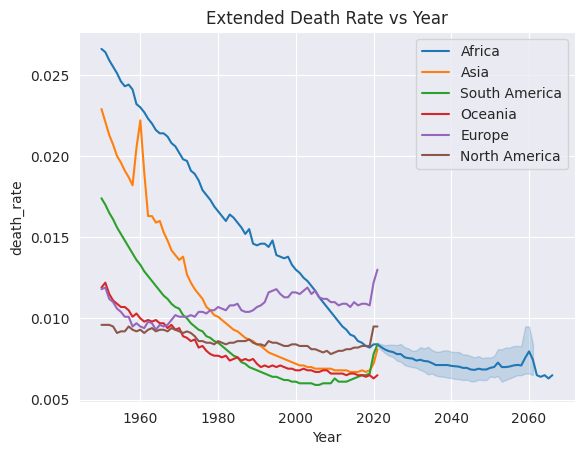

In [ ]:
sns.lineplot(africa_death_rate, x='Year', y='death_rate', label='Africa')
sns.lineplot(asia_death_rate, x='Year', y='death_rate', label='Asia')
sns.lineplot(latin_death_rate, x='Year', y='death_rate', label='South America')
sns.lineplot(oceania_death_rate, x='Year', y='death_rate', label='Oceania')
sns.lineplot(europe_death_rate, x='Year', y='death_rate', label='Europe')
sns.lineplot(north_death_rate, x='Year', y='death_rate', label='North America')
plt.title("Extended Death Rate vs Year")

In [ ]:
africa_population = continents[continents['Region, subregion, country or area *'] == 'AFRICA'][['Year', 'Total Population, as of 1 July']]
asia_population = continents[continents['Region, subregion, country or area *'] == 'ASIA'][['Year', 'Total Population, as of 1 July']]
europe_population = continents[continents['Region, subregion, country or area *'] == 'EUROPE'][['Year', 'Total Population, as of 1 July']]
latin_population = continents[continents['Region, subregion, country or area *'] == 'LATIN AMERICA AND THE CARIBBEAN'][['Year', 'Total Population, as of 1 July']]
north_population = continents[continents['Region, subregion, country or area *'] == 'NORTHERN AMERICA'][['Year', 'Total Population, as of 1 July']]
oceania_population = continents[continents['Region, subregion, country or area *'] == 'OCEANIA'][['Year', 'Total Population, as of 1 July']]

init_africa_population = africa_population[africa_population['Year'] == 2021]['Total Population, as of 1 July'].values[0]
init_asia_population = asia_population[asia_population['Year'] == 2021]['Total Population, as of 1 July'].values[0]
init_europe_population = europe_population[europe_population['Year'] == 2021]['Total Population, as of 1 July'].values[0]
init_latin_population = latin_population[latin_population['Year'] == 2021]['Total Population, as of 1 July'].values[0]
init_north_population = north_population[north_population['Year'] == 2021]['Total Population, as of 1 July'].values[0]
init_oceania_population = oceania_population[oceania_population['Year'] == 2021]['Total Population, as of 1 July'].values[0]


In [ ]:
collected_data = {
    "Africa": {
        "birth_rates": africa_birth_rate,
        "death_rates": africa_death_rate,
        "fitted_birth_rate_params": None,
        "fitted_death_rate_params": None,
        "init_population": init_africa_population,
    },
    "Asia": {
        "birth_rates": asia_birth_rate,
        "death_rates": asia_death_rate,
        "fitted_birth_rate_params": None,
        "fitted_death_rate_params": None,
        "init_population": init_asia_population,
    },
    "North America": {
        "birth_rates": north_birth_rate,
        "death_rates": north_death_rate,
        "fitted_birth_rate_params": None,
        "fitted_death_rate_params": None,
        "init_population": init_north_population,
    },
    "South America": {
        "birth_rates": latin_birth_rate,
        "death_rates": latin_death_rate,
        "fitted_birth_rate_params": None,
        "fitted_death_rate_params": None,
        "init_population": init_latin_population,
    },
    "Oceania": {
        "birth_rates": oceania_birth_rate,
        "death_rates": oceania_death_rate,
        "fitted_birth_rate_params": None,
        "fitted_death_rate_params": None,
        "init_population": init_oceania_population,
    },
    "Europe":{
        "birth_rates": europe_birth_rate,
        "death_rates": europe_death_rate,
        "fitted_birth_rate_params": None,
        "fitted_death_rate_params": None,
        "init_population": init_europe_population,
    },
}

In [ ]:
FORECASTED_LONG_RUN_BIRTH_RATE = 0.008

def general_birth_rate_func(x, a, b):
    return a*np.exp(-b * x) + FORECASTED_LONG_RUN_BIRTH_RATE

def general_death_rate_func(x, a):
    out = 0
    for i, p in enumerate(reversed(a)):
        out += p*(x**i)
    return out

In [ ]:
for continent_name, continent_data in collected_data.items():
    continent_birth_rates = continent_data['birth_rates']

    birth_params, birth_cov = scipy.optimize.curve_fit(general_birth_rate_func, (continent_birth_rates['Year'] - continent_birth_rates['Year'].min()).values, continent_birth_rates['birth_rate'].values)

    collected_data[continent_name]['fitted_birth_rate_params'] = (birth_params, birth_cov)

for continent_name, continent_data in collected_data.items():
    continent_death_rates = continent_data['death_rates']

    death_params, death_cov = np.polyfit(list((continent_death_rates['Year'] - continent_death_rates['Year'].min()).values) + [200], list(continent_death_rates['death_rate'].values) + [FORECASTED_LONG_RUN_BIRTH_RATE], deg=3, cov=True)

    collected_data[continent_name]['fitted_death_rate_params'] = (death_params, death_cov)

Text(0.5, 1.0, 'Forecasted Birth Rate vs Year')

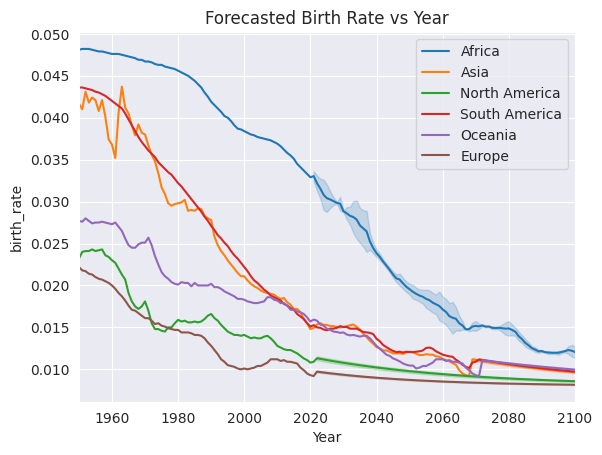

In [ ]:
NUM_SAMPLES = 1000
for continent_name, continent_data in collected_data.items():
    continent_birth_rates = continent_data['birth_rates']
    continent_birth_params, continent_birth_cov = continent_data["fitted_birth_rate_params"]

    prediction_start_year = continent_birth_rates['Year'].max() + 1

    time_shift = continent_birth_rates['Year'].min()

    years = np.arange(prediction_start_year, 2101)

    if prediction_start_year < 2100:
        for _ in range(1000):
            sampled_birth_params = np.random.multivariate_normal(mean=continent_birth_params, cov=continent_birth_cov)
            predictions = [(year, general_birth_rate_func(year - time_shift, sampled_birth_params[0], sampled_birth_params[1])) for year in years]
            prediction_df = pd.DataFrame(columns=['Year', 'birth_rate'], data=predictions)
            continent_birth_rates = pd.concat((continent_birth_rates, prediction_df))

    sns.lineplot(continent_birth_rates, x='Year', y='birth_rate', label=continent_name, errorbar=('sd', 1.28))
plt.xlim((1950, 2100))

plt.title("Forecasted Birth Rate vs Year")



Text(0.5, 1.0, 'Forecasted Death Rate vs Year')

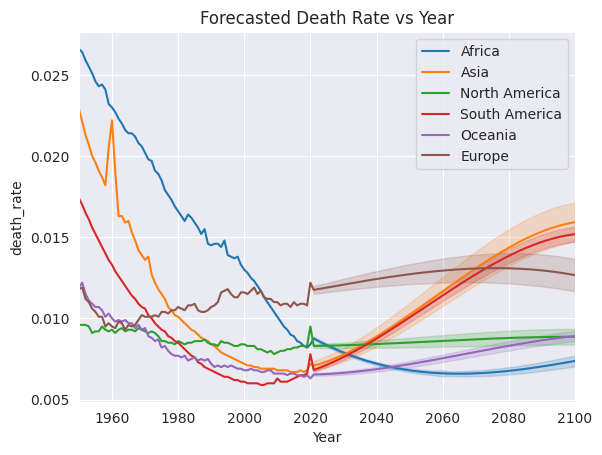

In [ ]:
NUM_SAMPLES = 1000
for continent_name, continent_data in collected_data.items():
    continent_death_rates = continent_data['death_rates']
    continent_death_params, continent_death_cov = continent_data["fitted_death_rate_params"]

    prediction_start_year = 2021 #continent_death_rates['Year'].max() + 1

    time_shift = continent_death_rates['Year'].min()

    years = np.arange(prediction_start_year, 2101)

    if prediction_start_year < 2100:
        for _ in range(1000):
            sampled_death_params = np.random.multivariate_normal(mean=continent_death_params, cov=continent_death_cov)
            predictions = [(year, general_death_rate_func(year - time_shift, sampled_death_params)) for year in years]
            prediction_df = pd.DataFrame(columns=['Year', 'death_rate'], data=predictions)
            continent_death_rates = pd.concat((continent_death_rates, prediction_df))

    sns.lineplot(continent_death_rates, x='Year', y='death_rate', label=continent_name, errorbar=('sd', 1.28))
plt.xlim((1950, 2100))

plt.title("Forecasted Death Rate vs Year")

In [ ]:
def approx_binomial(n, p, size=None):
    gaussian = np.random.normal(n*p, np.sqrt(n*p*(1-p)), size=size)
    # Add the continuity correction to sample at the midpoint of each integral bin.
    gaussian += 0.5
    if size is not None:
        binomial = gaussian.astype(np.int64)
    else:
        # scalar
        binomial = int(gaussian)
    return binomial

In [ ]:
class ContinentSimulator():
    def __init__(
            self,
            init_population,
            birth_rates,
            death_rates,
            alpha,
            beta,
            min_d,
            continent_name,
            ) -> None:
        self.n = 0
        self.ps = [init_population]
        self.brs = birth_rates
        self.drs = death_rates
        self.continent_name = continent_name

        self.alpha = alpha
        self.min_d = min_d
        self.beta = beta

        self.new_tech = 1.0

    def sample_births(self):
        #return approx_binomial(self.ps[-1], self.brs[self.n]*self.new_tech)
        return np.random.binomial(self.ps[-1], self.brs[self.n]*self.new_tech)

    def sample_deaths(self):
        #return approx_binomial(self.ps[-1], max(self.drs[self.n], 0))
        return np.random.binomial(self.ps[-1], max(self.drs[self.n], 0))

    def sample_disaster_indicator(self):
        return np.random.rand() < self.alpha

    def sample_disaster_amount(self):
        #return np.random.triangular(0, .95, 1)
        return 1 - np.power(np.random.uniform(0, 1), 40)

    def sample_new_tech_indicator(self):
        return np.random.rand() < self.beta

    def sample_new_tech_amount(self):
        return 1 + np.power(np.random.uniform(0, 1), 40)

    def step(self):
        is_disaster = self.sample_disaster_indicator()
        p_n = self.ps[-1]

        if self.sample_new_tech_indicator():
            self.new_tech *= self.sample_new_tech_amount()

        births = self.sample_births()
        deaths = self.sample_deaths()

        p_next = p_n + births - deaths

        if is_disaster:
            d = self.sample_disaster_amount()
            p_next = d * p_next

        self.ps.append(p_next)
        self.n += 1

    def set_population(self, multiplier):
        self.ps[-1] = self.ps[-1] * multiplier


    def plot(self):
        sns.lineplot(x=np.arange(2021, 2021 + len(self.ps)), y=self.ps, label=self.continent_name)

    def collect(self):
        return pd.DataFrame(columns=['Year', 'Population', 'Continent'], data=list(zip(np.arange(2021, 2021 + len(self.ps)), self.ps, [self.continent_name]*len(self.ps))))

class Simulator():
    def __init__(
            self,
            continent_data,
            alpha,
            beta,
            min_d,
            ) -> None:

        self.n = 0
        self.continent_data = continent_data
        self.alpha = alpha
        self.beta = beta
        self.min_d = min_d
        self.total_populations = []

        self.simulations = []

        for continent_name, continent_data in self.continent_data.items():
            sampled_birth_rates = Simulator.get_continent_birth_rates(continent_data)
            sampled_death_rates = Simulator.get_continent_death_rates(continent_data)
            init_population = continent_data['init_population']


            simulation = ContinentSimulator(
                init_population,
                sampled_birth_rates,
                sampled_death_rates,
                self.alpha,
                self.beta,
                self.min_d,
                continent_name
            )

            self.simulations.append(simulation)

        self.set_total_population()

    def sample_disaster_indicator(self):
        return np.random.rand() < self.alpha

    def sample_disaster_amount(self):
        #return np.random.triangular(0, .95, 1)
        return 1 - np.power(np.random.uniform(0, 1), 50)

    def set_total_population(self):
        assert self.n == len(self.total_populations), ("Don't call set total populations twice in one step.", self.n, len(self.total_populations))

        total_population = 0

        for simulation in self.simulations:
            assert len(simulation.ps) == len(self.total_populations) + 1, "Global simulation should be 1 step behind."
            total_population += simulation.ps[-1]

        self.total_populations.append(total_population)

    def step(self):
        for simulation in self.simulations:
            simulation.step()

        if self.sample_disaster_indicator():
            disaster_amount = self.sample_disaster_amount()
            for simulation in self.simulations:
                simulation.set_population(disaster_amount)

        self.n += 1
        self.set_total_population()


    @staticmethod
    def get_continent_birth_rates(continent_data):
        continent_birth_rates = continent_data['birth_rates']
        continent_birth_params, continent_birth_cov = continent_data["fitted_birth_rate_params"]

        prediction_start_year = continent_birth_rates['Year'].max() + 1
        years = np.arange(prediction_start_year, 2101)
        time_shift = continent_birth_rates['Year'].min()

        years = np.arange(prediction_start_year, 2101)

        if prediction_start_year < 2100:
            sampled_birth_params = np.random.multivariate_normal(mean=continent_birth_params, cov=continent_birth_cov)
            predictions = [(year, general_birth_rate_func(year - time_shift, sampled_birth_params[0], sampled_birth_params[1])) for year in years]
            prediction_df = pd.DataFrame(columns=['Year', 'birth_rate'], data=predictions)
            continent_birth_rates = pd.concat((continent_birth_rates, prediction_df)).sort_values("Year")

        return continent_birth_rates[continent_birth_rates['Year'] >= 2021]['birth_rate'].values

    @staticmethod
    def get_continent_death_rates(continent_data):
        continent_death_rates = continent_data['death_rates']
        continent_death_params, continent_death_cov = continent_data["fitted_death_rate_params"]

        prediction_start_year = 2021 #continent_death_rates['Year'].max() + 1

        time_shift = continent_death_rates['Year'].min()

        years = np.arange(prediction_start_year, 2101)

        if prediction_start_year < 2100:
            sampled_death_params = np.random.multivariate_normal(mean=continent_death_params, cov=continent_death_cov)
            predictions = [(year, general_death_rate_func(year - time_shift, sampled_death_params)) for year in years]
            prediction_df = pd.DataFrame(columns=['Year', 'death_rate'], data=predictions)
            continent_death_rates = pd.concat((continent_death_rates, prediction_df)).sort_values("Year")

        return continent_death_rates[continent_death_rates['Year'] >= 2021]['death_rate'].values

    def run(self, steps):
        for _ in range(steps):
            self.step()

    def plot_continent_populations(self):
        for simulation in self.simulations:
            simulation.plot()

    def plot_total(self):
        sns.lineplot(x=np.arange(2021, 2021 + len(self.total_populations)), y=self.total_populations, label="Total Population")

    def collect(self):
        return pd.DataFrame(columns=['Year', 'Total Population'], data=list(zip(np.arange(2021, 2021 + len(self.total_populations)), self.total_populations)))

    def collect_continents(self):
        return pd.concat([simulation.collect() for simulation in self.simulations])


In [ ]:
simulated_populations = []
simulated_continent_populations = []
for _ in range(10000):
    simulation = Simulator(collected_data, 0.001, 0.001, 0.0)
    simulation.run(79)
    simulated_populations.append(simulation.collect())
    simulated_continent_populations.append(simulation.collect_continents())

simulated_population = pd.concat(simulated_populations)
simulated_continent_population = pd.concat(simulated_continent_populations)

Text(0.5, 1.0, 'Forecasted Total Population vs Year')

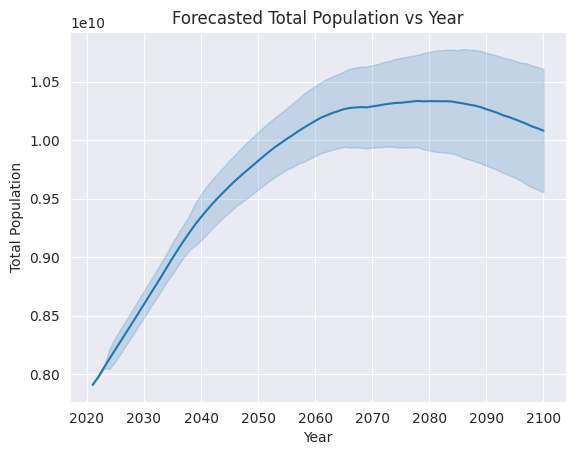

In [ ]:
sns.lineplot(simulated_population, x='Year', y='Total Population', errorbar=('sd', 1.28))
plt.title("Forecasted Total Population vs Year")

Text(0.5, 1.0, 'Forecasted Total Population vs Year by Continent')

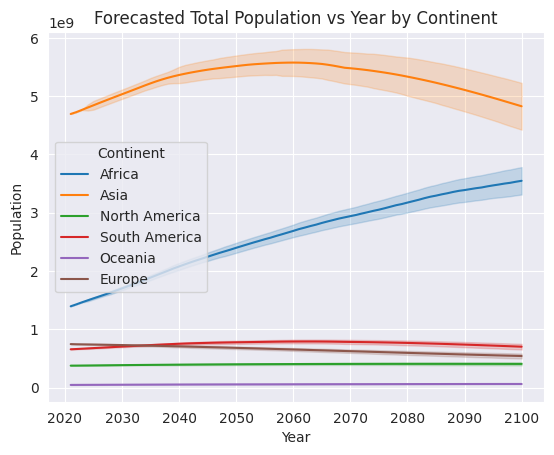

In [ ]:
sns.lineplot(simulated_continent_population, x='Year', y='Population', errorbar=('sd', 1.28), hue='Continent')
plt.title("Forecasted Total Population vs Year by Continent")

Text(0.5, 1.0, 'Forecasted Total Population in 2100 Distribution')

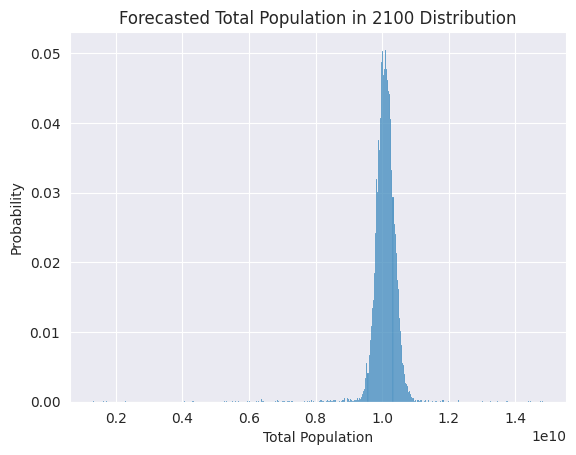

In [ ]:
sns.histplot(simulated_population[simulated_population['Year'] == 2100], x='Total Population', stat='probability')
plt.title("Forecasted Total Population in 2100 Distribution")

In [ ]:
sd = np.std(simulated_population[simulated_population['Year'] == 2100]['Total Population'].values)
mean = np.mean(simulated_population[simulated_population['Year'] == 2100]['Total Population'].values)
n = len(simulated_population[simulated_population['Year'] == 2100]['Total Population'].values)

In [ ]:
mean

10081237420.977497

In [ ]:
mean + 1.28*sd

10607945112.579166

In [ ]:
mean - 1.28*sd

9554529729.375828

Text(0.5, 1.0, 'Forecasted Total Population vs Year by Medium Continents')

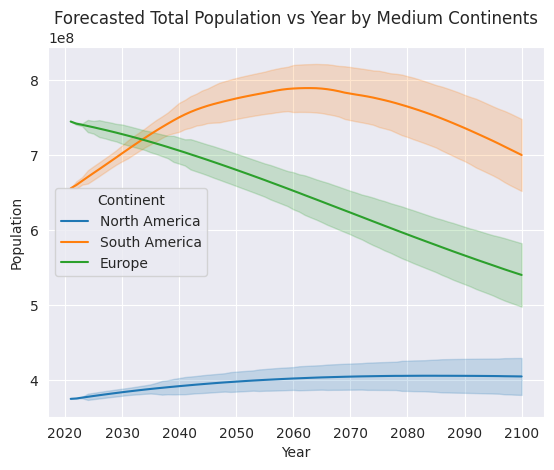

In [ ]:
sns.lineplot(simulated_continent_population.query("Continent == 'Europe' or Continent == 'North America' or Continent == 'South America'"), x='Year', y='Population', errorbar=('sd', 1.28), hue='Continent')
plt.title("Forecasted Total Population vs Year by Medium Continents")

Text(0.5, 1.0, 'Forecasted Total Population vs Year by Large Continents')

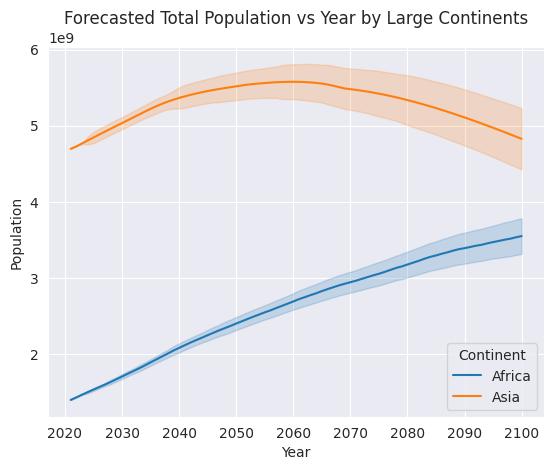

In [ ]:
sns.lineplot(simulated_continent_population.query("Continent == 'Asia' or Continent == 'Africa'"), x='Year', y='Population', errorbar=('sd', 1.28), hue='Continent')
plt.title("Forecasted Total Population vs Year by Large Continents")

Text(0.5, 1.0, 'Forecasted Total Population vs Year by Small Continents')

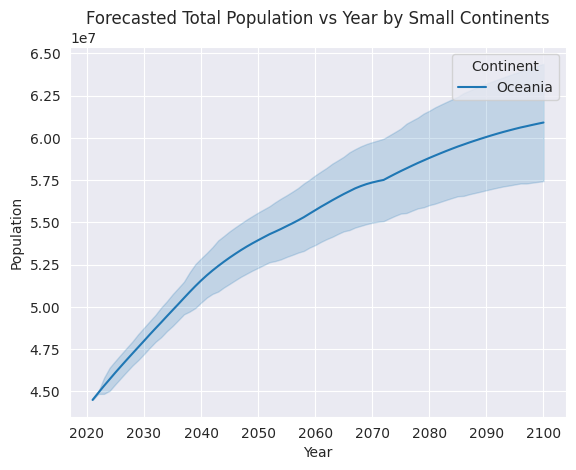

In [ ]:
sns.lineplot(simulated_continent_population.query("Continent == 'Oceania'"), x='Year', y='Population', errorbar=('sd', 1.28), hue='Continent')
plt.title("Forecasted Total Population vs Year by Small Continents")

In [ ]:
simulated_population

,Year,Total Population
0,2021,7.909295e+09
1,2022,7.977728e+09
2,2023,8.057129e+09
3,2024,8.134699e+09
4,2025,8.211282e+09
...,...,...
75,2096,9.805490e+09
76,2097,9.781718e+09
77,2098,9.753791e+09
78,2099,9.731039e+09
